###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 C.M. Roberts.

# Option Valuation using Numerical Methods:
## A Python Programming Approach

There are many different kinds of assets traded in modern financial markets, nearly all falling within one of the five main categories of stock, bond, commodity, currency, or derivative.  Most folks have a basic understanding of stocks (equity in a business) and bonds (financial contracts issued by the government), and those who are more economically savvy may also be familiar with the trade of commodities (goods such as gold, oil, or grain) and currencies (investments in money, both foreign and domestic).  However, few individuals outside of the financial and academic worlds know much about derivatives.  A derivative is a financial instrument whose value is derived from some other asset such as a stock or commodity. In his excellent book, <em>In Pursuit of the Unknown: 17 Equations That Changed the World</em>, the English mathematician, Ian Stewart, states, 
<br><br>
<em style="text-align: center;">“Since the turn of the century the greatest source of growth in the financial sector has been in financial instruments known as derivatives.  Derivatives are not money, nor are they investments in stocks or shares.  They are investments in investments, promises about promises… This is finance in cloud cuckoo land, yet it has become the standard practice of the world’s banking system.”</em>
<br><br>
Mr. Stewart certainly has a rather sour view on derivatives, but his words also help describe their importance in today’s financial landscape.  One simply can not make it in the financial world without a firm understanding of derivatives and their qualities. 
In this module,  we will learn about some basic derivatives, how they can be characterized mathematically, and how their value can be estimated using different numerical schemes.

## Keeping Our Options Open

Perhaps the most common derivative is the option, in which the owner of the option has the right to <em>buy </em>the underlying asset at a specific price by some specified date (this is called a <strong>call</strong>) or else the owner has the right to <em>sell</em> the underlying asset at a specific price and date (this is called a <strong>put</strong>).  The price specified in the option contract is called the strike price and the date is simply referred to as the expiration date.  For the time being, we will consider only European options, a style of option whereby the owner may only exercise the option (that is, buy or sell the underlying asset) at the expiration date and no sooner.  Letting $K$ be the strike price and $S$ be the value of the underlying asset, the payoff $V$ of an option at expiration time can be characterized as

$$V_{call} =  \textrm{max}(S - K, 0)$$
$$V_{put} =  \textrm{max}(0, K - S)$$

The payoffs are described this way because if the owner does not stand to make money by exercising the option, they will opt to simply let it expire and may choose to buy or sell the asset at the market price, $S$, thereby having a payoff of $0. <br><br>


Now let us put ourselves in the shoes of a trader who is considering whether or not to buy (and thus become the owner of) a certain option.  We know the terms of the contract, that is the strike price and time of expiration.  We also know some facts about the current state of the market including the present value of the asset, the risk-free interest rate (i.e. how much interest money would accrue sitting in a bank), and the level of volatility in the market.  Knowing all of this, what can we calculate to be the fair price of the option? <br>

As it turns out, this is no simple task. Luckily for us, in 1973 two economists named Fischer Black and Myron Scholes (with the help of a third economist, Robert Merton) derived an equation describing the price of an option over time.  The equation is

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$$

where $t$ is time, $\sigma$ is volatility, and $r$ is the risk-free interest rate.  This is pretty exciting stuff and the group was awarded the Nobel Prize in Economics in 1997 for their work.  For our purposes, we must note that the Black-Scholes equation has an analytic solution for European puts and calls, called the Black-Scholes formula and it is as follows:


$$V(S,t) = \epsilon S\Phi(\epsilon d1) - \epsilon Ke^{-r(T-t)}\Phi(\epsilon d2)$$
where $$ d1 = \frac{\ln(S/K)+(T-t)(r+\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$ d2 = \frac{\ln(S/K)+(T-t)(r-\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$\Phi(\zeta) = \frac{1}{2\pi}\int_{-\infty}^\zeta e^{-\eta^2/2}d\eta $$<br>
$$\epsilon = \bigg\{{1 \textrm{     for a call} \atop -1 \textrm{     for a put}} $$

Here, $T$ is the time of expiration and $V(S,t)$ is the value of the option at any time $t$. Armed with this formula, let us return to the issue at hand: valuing an option.  Let us suppose that we know the option has a strike price $K = \$40$, expiration $T = 0.5 \textrm{ years}$, and we know the market has a risk-free interest rate $r = 0.1$ and a volatility $\sigma = 0.25$.  Using Python and the Black-Scholes formula, the fair price for the option can be calculated for a range of possible current asset prices.

In [2]:
#Import necessary libraries and functions
import numpy as np
from scipy.stats import norm #Phi() is the normal CDF

#Allow plots in notebook and format plots
%matplotlib inline
import matplotlib.pyplot as pyplot
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'

In [3]:
def bs_formula(type, S, K, T, r, sigma):
    """Computes price of European call or put using the Black-Scholes formula
    
    Parameters:
    ----------
    type: string
        Type of option;"C" for a call or "P" for a put
    S: array of float
        Initial asset price or an array of initial asset prices
    K: float
        Strike price
    T: float
        Expiration time
    r: float
        risk-free interest rate, expressed between 0 and 1
    sigma: float
        market volatility, expressed between 0 and 1
    
    Returns:
    -------
    V: array of float
        Initial option value or an arrat of initial option values
    """
    
    
    if type == "C":
        eps = 1
    elif type == "P":
        eps = -1
    d1 = (np.log(S/K) + T*(r + 0.5*sigma**2))/(sigma*np.sqrt(T))
    d2 = (np.log(S/K) + T*(r - 0.5*sigma**2))/(sigma*np.sqrt(T))
    V = eps*S*norm.cdf(eps*d1) - eps*K*np.exp(-r*T)*norm.cdf(eps*d2)
    V = np.clip(V, 0, np.inf)
    return V

In [4]:
#Parameters
K = 40 #strike price
T = 0.5 #expiration time
r = 0.1 #interest rate
sigma = 0.25 #volatility

S = np.linspace(1, 100,100) #array of possible current asset prices

Since we have defined a function that can value a European option, let's go ahead and apply it.  We will assume an initial asset price of \$45.

In [5]:
V_call = bs_formula("C", S, K, T, r, sigma)
print("Exact value of European call given initial asset price of $45 is $%.3f" %V_call[44])
V_put = bs_formula("P", S, K, T, r, sigma)
print("Exact value of European put given initial asset price of $45 is $%.3f" %V_put[44])

Exact value of European call given initial asset price of $45 is $7.620
Exact value of European put given initial asset price of $45 is $0.669


Great!  We have our result.  In fact, we calculated a whole array of results, each one based upon a different initial asset price.  If we graph all of these results, we may gain a better understanding of how European options function and how calls and puts differ in their payoffs.

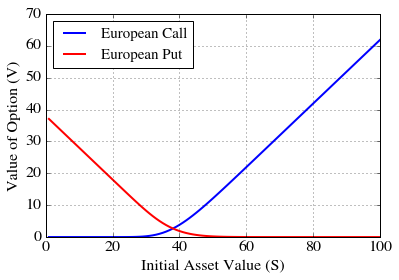

In [6]:
pyplot.plot(S,V_call,color='blue', lw=2, label="European Call")
pyplot.plot(S,V_put,color='red', lw=2, label="European Put")
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.grid()
pyplot.legend(loc='upper left',prop={'size':15});


## No solution? There's a solution for that!

The Black-Scholes formula is a godsend, but sometimes it doesn't work.  One such case is when volatility is not constant over the lifetime of an option. In such an instance, the Black-Scholes equation (recall the difference between the <em>equation</em> and the <em>formula</em>) still applies, but a neat, analytic solution just doesn't exist.  To value an option under these circumstances, we have to use a numerical scheme which will provide an estimate of the option's value.  Several numerical schemes exist that are capable of doing this, but here we choose to focus on the Crank-Nicolson method due to its accuracy and stability.

To implement the Crank-Nicolson scheme, we first construct a two-dimensional grid of asset price versus time and we then discretize the Black-Scholes equation using a forward difference in time and central difference in asset price. A key feature of the Crank-Nicolson method is that for asset price, we actually average the central difference of the current time step with the central difference of the next time step.  This approach yields the following terms: 

$$\frac{\partial V}{\partial t} \approx \frac{V^{n+1}_m - V^{n}_m }{\Delta t}$$

$$\frac{\partial V}{\partial S} \approx \frac{V^{n}_{m+1} - V^{n}_{m-1} + V^{n+1}_{m+1} - V^{n+1}_{m-1}}{4 \Delta S}$$

$$ \frac{\partial^2 V}{\partial S^2} \approx \frac{V^{n}_{m+1} - 2 V^{n}_{m} + V^{n}_{m-1} + V^{n+1}_{m+1} - 2 V^{n+1}_{m} + V^{n+1}_{m-1}}{2 \Delta S^2}$$

where $n$ is the index in time and $m$ is the index in asset price.  By taking into account that $S = m\Delta S$, substituting the above terms into the Black-Scholes equation, and then separating those terms which are known (with time index $n$) from those that are unknown (with time index $n+1$), we get 

$$\frac{\Delta t}{4}(rm - \sigma^2m^2)V^{n+1}_{m-1} + (1 + \frac{\Delta t}{2}(r + \sigma^2m^2))V^{n+1}_{m} + (-\frac{\Delta t}{4}(rm + \sigma^2m^2))V^{n+1}_{m+1} = \\ \frac{\Delta t}{4}(-rm + \sigma^2m^2)V^{n}_{m-1} + (1 + \frac{\Delta t}{2}(r + \sigma^2m^2))V^{n}_{m} + (\frac{\Delta t}{4}(rm + \sigma^2m^2))V^{n}_{m+1}$$ 

or, if we define $a = \frac{\Delta t}{4}(rm - \sigma^2m^2)$, $b = \frac{\Delta t}{2}(r + \sigma^2m^2)$, and $c = -\frac{\Delta t}{4}(rm + \sigma^2m^2)$, we get 

$$ aV^{n+1}_{m-1} + (1+b)V^{n+1}_{m} + cV^{n+1}_{m+1} = -aV^{n}_{m-1} + (1-b)V^{n}_{m} -cV^{n}_{m+1} $$

which is a bit easier to handle.  This equation only takes into account one time step into the future and a total of three asset prices.  To solve for a number of asset prices at once, we can create a system of linear equations where each equation applies to a different subset of the set of asset prices (for example, if the first equation deals with $m-1$, $m$, and $m+1$, the second will deal with $m$, $m+1$, and $m+2$). Such a system will be in the form 

$$[A_1][V^{n+1}_{int}] = [A_2][V^{n}_{int}] + [B.C.] $$

where $[B.C]$ is a column vector containing appropriate boundary conditions. To determine these boundary conditions, we first have to determine if we are valuing a call or put. If we are concerned with a call, we know the payoff is $V(S,t) = \max(S - K, 0)$.  Given a set of asset prices ranging from $0$ to some $S_{max}$, we know that $V(0,t) = 0$.  This is our first of two boundary conditions. Our second boundary condition is derived from our knowledge that $V(S_{max},t) = S_{max} - K$.  Letting the largest possible asset price $S_{max}$ have the index $M$, we can arrive at the equation:

$$ aV^{n+1}_{M-2} + (1+b)V^{n+1}_{M-1} + cV^{n+1}_{M} = -aV^{n}_{M-2} + (1-b)V^{n}_{M-1} -cV^{n}_{M} $$

Substituting those terms having index $M$ with $S_{max} - K$ and once again moving all known values to the right side of the equation, we get

$$ aV^{n+1}_{M-2} + (1+b)V^{n+1}_{M-1} = -aV^{n}_{M-2} + (1-b)V^{n}_{M-1} - 2c(S_{max} - K)$$

Thus, $$ [B.C.] =  \left[ \begin{array}{c} 0 \\ \vdots \\ \\ 0 \\ - 2c(S_{max} - K) \end{array} \right]$$ 

With $[B.C.]$ now determined and $[A_1]$ and $[A_2]$ easily determined from our discretization of the Black-Scholes equation, we can now construct a linear system of equations for a European call. Given a set of asset prices of size $M$, ranging from 0 to $S_{max}$, such a system can be characterized by

$$ \left[ \begin{array}{cccccc} (1+b) & c & 0 & \cdots & & 0 \\ a & (1+b) & c & 0 & \cdots & 0 \\ 0 & & \ddots & & & \vdots \\ \vdots & & & a & (1+b) & c  \\ 0 & \cdots & & 0  & a & (1+b) \end{array} \right] \left[ \begin{array}{c}V^{n+1}_{1}\\V^{n+1}_{2}\\ \vdots \\ V^{n+1}_{M-1}\\ V^{n+1}_{M} \end{array} \right] = \\ \left[ \begin{array}{cccccc} (1-b) & -c & 0 & \cdots & & 0 \\ -a & (1-b) & -c & 0 & \cdots & 0 \\ 0 & & \ddots & & & \vdots \\ \vdots & & & -a & (1-b) & -c  \\ 0 & \cdots & & 0  & -a & (1-b) \end{array} \right] \left[ \begin{array}{c}V^{n}_{1}\\V^{n}_{2}\\ \vdots \\ V^{n}_{M-1}\\ V^{n}_{M} \end{array} \right] +  \left[ \begin{array}{c} 0 \\ \vdots \\ \\ 0 \\ - 2c(S_{max} - K) \end{array} \right]$$

This system applies only to one time step, so in order to succesfully value an option, we must solve this system repeatedly for each time step from the initial time to the time the option expires.  

Now that we have derived the Crank-Nicolson scheme for valuing European calls, let's define a Python function to implement it.

In [7]:
#import function to solve matrices
from scipy.linalg import solve

In [8]:
def cn_call(V, N, r, dt, sigma, S_max, K):
    """Solves for value of European call using Crank-Nicolson scheme
    
    Parameters:
    ----------
    V: array of float
        option values if call expired immediately
    N: integer
        number of time steps
    r: float
        risk-free interest rate
    dt: float
        time step length
    sigma: array of floats
        volatility over asset lifetime
    S_max: float
        maxmum asset value
    K: float
        strike price
        
    Returns:
    -------
    Vn: array of float
        option values given parameters
    """
    
    
    M = np.shape(V)[0] - 1 #number of initial values
    i = np.arange(1,M) #array of indexes
    Vn = np.copy(V) 
    
    for t in range(N):  
        a = dt/4 * (r*i - sigma[t]**2*i**2)
        b = dt/2 * (r + sigma[t]**2*i**2)
        c = -dt/4 * (r*i + sigma[t]**2*i**2)
        
        #create LHS of Ax = b
        A = np.diag(1+b) + np.diag(c[:-1], 1) + np.diag(a[1:],-1)
        
        #create RHS of Ax = b
        B = np.diag(1-b) + np.diag(-c[:-1], 1) + np.diag(-a[1:],-1) #create matrix of RHS coefficients
        B = np.dot(B,Vn[1:-1]) #multiply coeff's by current option values
        B[-1] += -2*c[-1] * (S_max - K) #apply boundary condition
        
        #solve Ax = b
        Vn[1:-1] = solve(A,B)
    
    return Vn
    

In [9]:
#Parameters
N = 100 #number of time steps
T = 0.5 #expiration time
dt = T/N #timestep size
K = 40 #strike price
r = 0.1 #interest rate

S_max = 4*K #arbitrary maximum asset value of four times strike price
S = np.linspace(0, S_max, 161) #array of some possible current asset prices
V0 = np.clip(S - K, 0, S_max-K) #initial payoff value of option

#constant volatility of 0.25
sigma_const = np.zeros(N)[:] + 0.25 

Let us proceed by computing option values for the same initial asset price as before using the Crank-Nicolson function we have just defined.  Then, we can graphically compare the Crank-Nicolson results to the analytic results.

In [10]:
#apply CN for constant volatility
V_cn = cn_call(V0, N, r, dt, sigma_const, S_max, K)

print("CN estimated value of European call given initial asset price of $45 is $%.3f" %V_cn[45])

CN estimated value of European call given initial asset price of $45 is $7.616


In [11]:
#recalculate analytic solution with new S array
V_call = bs_formula("C", S, K, T, r, sigma)

C:\Users\croberts94\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\croberts94\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: divide by zero encountered in log


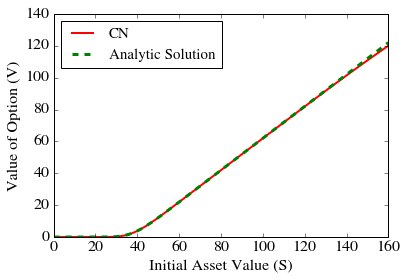

In [12]:
pyplot.plot(S,V_cn,color='red', lw = 2,label='CN')
pyplot.plot(S,V_call,color='green', ls='--', lw = 3, label='Analytic Solution')
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.legend(loc='upper left',prop={'size':15});

That looks pretty great! Clearly, some error exists, but we can get pretty near to the exact, analytic result using the Crank-Nicolson scheme. We will now move on to pricing an option under a non-constant volatility.

In [13]:
#volatilty stepping from 0.0 to 0.8
sigma_step = np.zeros(N)
sigma_step[int(N/2):]+= 0.8

In [14]:
#apply CN for  non-contstant volatility
V_cn_step = cn_call(V0, N, r, dt, sigma_step, S_max, K)

print("CN estimated value of European call given initial asset price of $45 is $%.3f" %V_cn_step[45])

CN estimated value of European call given initial asset price of $45 is $10.616


(0, 35)

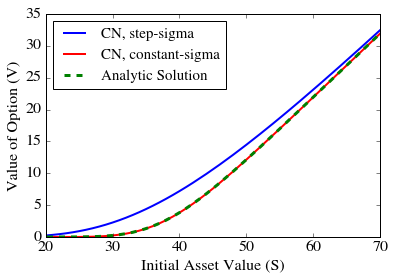

In [15]:
pyplot.plot(S,V_cn_step,color='blue', lw=2, label='CN, step-sigma')
pyplot.plot(S,V_cn,color='red', lw = 2,label='CN, constant-sigma')
pyplot.plot(S,V_call,color='green', ls='--', lw = 3, label='Analytic Solution')
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.legend(loc='upper left',prop={'size':15});
pyplot.xlim(20,70)
pyplot.ylim(0,35)

Well would you look at that.  Having a non-constant volatility can completely shift our valuation for an option!  Perhaps it's unrealistic to expect anyone to know precisely how market volatility will change over a given period of time (an old joke comes to mind about how weathermen and economists are the only people who can consistently be wrong and still keep their jobs), but the point is that as factors in the market change, the analytic solution starts to become irrelevant.  A strong numerical scheme such as the Crank-Nicolson method is an indispensable tool for traders in an ever-shifting financial landscape.

## Life, Liberty, and the Freedom to Exercise Early

So far, we have focused only on European options where the owner may exercise the option only at the time of expiration. We now move on to American options, a style in which the option can be exercised at any time during its lifetime.  It should be noted that these names merely denote the option style and have nothing to do with where these options are actually traded.<br>

Due to the nature of American options, it is necessary to check at every time step for the possibility of early exercise, making a Black-Scholes approach insufficient. Instead, a popular method for tackling the valuation of American options is the binomial model, proposed by Cox, Ross, and Rubinstein in 1979.  In the binomial model, we start with the knowledge that over the course of one time step, the stock price $S$ can move up to some value $Su$ with probability $p$ or down to some value $Sd$ with probability $1-p$. For a call option, then, we can define the value of the option after one up-tick to be <br>

$$V_u = \max(Su - K,0)$$ <br>and the value after a down-tick to be <br>

$$V_d = \max(Sd - K,0)$$.

Building from this, the current value of the option can be taken to be the expected value of its possible future values, discounted by the interest that would be accrued between now and said future values. This can be expressed as

$$ V = e^{-rdt}[pV_u + (1-p)V_d] $$

and we shall note here that 

$$ u = e^{\sigma\sqrt{dt}} $$ <br>
$$ d = 1/u = e^{-\sigma\sqrt{dt}} $$ <br>
$$p = \frac{e^{rdt}-d}{u - d}$$

We won't be troubled over the derivation of $u$,$d$, and $p$ for the purposes of this lesson, but the <a href="https://www.researchgate.net/profile/Stephen_Ross3/publication/4978679_Option_pricing_A_simplified_approach/links/09e4151363b7910ad9000000.pdf">Cox, Ross, Rubenstein paper</a> is actually quite interesting and is worth the read.

So at every time step, the value of the asset (and, correspondingly, the option) has the possibility of moving up or down.  Over the course of many time steps, the possibilities spread out, forming what is known as a binomial tree (pictured below).

<img src="./figures/bintree.PNG">
<em style = "text-align: left; font-size: 0.8em">Image source: https://upload.wikimedia.org/wikipedia/commons/2/2e/Arbre_Binomial_Options_Reelles.png</em>

Each box in the tree is referred to as a leaf.  The easiest and most common way of finding an option's value using the binomial method is to use given information to find the asset values at all of the final leaves (that is, the leaves existing at the time of expiration), and then working backwards towards a fair value for the option at the beginning of its lifetime. The first step is to use the time of expiration $T$, the number of time steps $N$, the risk-free interest rate $r$, and the market volatility $\sigma$ (we once again assume this to be constant over the lifetime of the option) to find $u$,$d$, and $p$.  Next, we can express the leaves at the expiration time as a list of the form

$$ S_0d^Nu^0,\ S_0d^{N-1}u^1,\ S_0d^{N-2}u^2,...,S_0d^2u^{N-2},\ S_0d^1u^{N-1},\ S_0d^0u^{N} $$

where $S_0$ is the initial asset value.  Using the formulae mentioned earlier in this section, we can then use these final asset values to make a list of final option values. These final option values can then be used to determine the option values at the preceding time step, and then these option values can be used to solve for the previous option values, and so on and so forth until we have arrived at the initial value of the option. If the option is American, at each iteration we must also compare the value of holding the option longer versus the value of exercising it early.  If the option has a higher value if exercised early, then we assume that the owner of the option would do so and we replace the recursively calculated value at that leaf with the early exercise value. To perform this scheme using Python, we can write a function such as the one below:

In [16]:
def binomial(type, S0, k, r, sigma, T, N ,american="false"):
    """ Computes option value for European or American options using the binomial method
    
    Paramters:
    ---------
    type: string
        type of option; "C" for call, "P" for put
    S0: float
        initial asset price
    k: float
        strike price
    r: float
        risk-free interest rate
    sigma:float
        volatility
    T: float
        Expiration time
    N: integer
        number of time steps
    american: string (Boolean input)
        american="true" for American option, american="false" for European option 
    
    Returns:
    -------
    V[0]: float
        option value given parameters
    """
    
    dt = T/N #time step
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    K = np.ones(N+1)*k #strike price array
    p = (np.exp(r * dt) - d)/ (u - d)
    V =  np.zeros(N+1) #initialize option value array
    
    #expiration asset prices (S)
    S = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])  
    
    #expiration option values (V)
    if type =="C":
        V = np.clip(S - K, 0, np.inf)
    elif type =="P":
        V = np.clip(K - S, 0, np.inf)
   
    #calculate backwards the option prices
    for i in range(N-1, -1, -1):
        #Current Option Value: V = e^(-r*dt)(pVu + (1-p)Vd)
        V[:-1]=np.exp(-r * dt) * (p * V[1:] + (1-p) * V[:-1])
        #Current Assett Values
        S[:-1] = S[:-1]*u

        if american=='true':
        #Check if current exercise value is greater than exercise at expiration. If so, exercise early.
            if type =="C":
                V = np.maximum(V, S - K)
            elif type =="P":
                V = np.maximum(V, K - S)
    
    #Return value of option at t=0
    return V[0]

<em style="font-size: 0.8em">Please note that while the above code is the original work of the author, it owes much of its overall structure to a code found <a href = "http://gosmej1977.blogspot.be/2013/02/american-options.html">here</a>. I would be remiss not to say thank you to one Julien Gosme for providing the framework for this code on his/her blog.</em>

Let's now define our parameters once again and use the binomial function to estimate the value of different options.

In [17]:
#Parameters
N = 100 #number of time steps
T = 0.5 #expiration time
K = 40 #strike price
r = 0.1 #interest rate
sigma = 0.25 #volatility
S0 = 45 #initial asset price

In [18]:
print("Given an initial asset price of $45:")
V_bin_EC = binomial("C", S0, K, r, sigma, T, N ,american="false")
print("The value of a European Call is $%.3f" %V_bin_EC)
V_bin_EC = binomial("P", S0, K, r, sigma, T, N ,american="false")
print("The value of a European Put is $%.3f" %V_bin_EC)
V_bin_EC = binomial("C", S0, K, r, sigma, T, N ,american="true")
print("The value of an American Call is $%.3f" %V_bin_EC)
V_bin_EC = binomial("P", S0, K, r, sigma, T, N ,american="true")
print("The value of an American Put is $%.3f" %V_bin_EC)

Given an initial asset price of $45:
The value of a European Call is $7.623
The value of a European Put is $0.672
The value of an American Call is $7.623
The value of an American Put is $0.723


If we compare our analytic values for a European call/put to those estimated above, we see that the binomial model does a pretty good job of estimating an option's value. Also, notice how the values for the European and American calls are identical, while the value of the American put is greater than its European counterpart. This is because under the assumptions of our model (i.e. no <a href="http://www.investopedia.com/terms/d/dividend.asp">dividends</a> and no <a href="http://www.investopedia.com/terms/a/arbitrage.asp">arbitrage</a>), it is never optimal for the owner of an American call to exercise early.  However, there do exist some circumstances where the owner of an American put would exercise early, thus raising its value compared to a plain old European put. For a mathematical proof of why this is the case, check out this <a href="http://www.math.nyu.edu/~cai/Courses/Derivatives/lecture8.pdf">lecture outline</a> from NYU.

Also, it may seem like we've wandered off pretty far from the realm of partial differential equations, but in fact we never left.  If we were to shorten the length of the time step used in the binomial model to an infinitesimally tiny size, effectively migrating from discrete to continuous time, we would observe that the binomial model <a href = "http://www.bus.lsu.edu/academics/finance/faculty/dchance/Instructional/TN00-08.pdf">converges to the Black-Scholes model</a> (for European options, at least).  We are still looking at the very same problem governed by the same PDE, but whereas the analytic and finite-difference (e.g. Crank-Nicolson) methods take a careful, highbrow approach, the binomial method trades elegance for elbow grease to get the job done.  It's the quintessential American way!

## Tokyo Royale

Okay, so that title is a pretty lame joke, but it fits because what we are going to be looking at in this section is valuing an Asian option using the Monte Carlo method. Again, the name of the option has nothing to do with where it is traded, rather a couple of English financial analysts happened to be in Tokyo when they devised it.  The Asian option is different from other options because its payoff is derived from the average asset price over the option's lifetime, making it path-dependent. These options have an advantage of being less susceptible to volatility than European or American options, but they also pose a challenge for estimating their value, as there are a huge number of possible paths an asset's price can take over even a relatively small period of time.

This challenge can be met using the Monte Carlo method, which owes its name to the fact that its underlying principle is akin to rolling a dice over and over, as in a casino.  To use this method, we start by simulating a single path that the price of the asset may take between the time the option is created to the time of expiration. The asset price is assumed to follow 

$$ dS = \mu Sdt + \sigma SdW(t) $$

where $dW(t)$ is a Wiener (i.e. Brownian) process and $\mu$ is the expected return on the asset in a risk-neutral world.  The assumption that an asset price follows a random walk underpins both the Black-Scholes and binomial models and by invoking it here, we are maintaining consistency with the work we have done so far in this module. If we let $dS$ be the change in asset price over some very small time step $dt$ and substitute $r$ for $\mu$ (because they are synonymous in this context), we can rearrange this equation to be

$$ S(t + dt) - S(t) = rS(t)dt + \sigma S(t)Z\sqrt{dt} $$

where $Z\sim N(0,1)$.  It is more accurate to simulate $\ln S(t)$ than $S(t)$, so we use <a href="https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma">Ito's lemma</a> to transform our equation, yielding

$$\ln S(t + dt) - \ln S(t) = (r - \frac{\sigma^2}{2})dt + \sigma Z\sqrt{dt}$$

which is equivalent to

$$S(t + dt) = S(t)e^{(r - \frac{\sigma^2}{2})dt + \sigma Z\sqrt{dt}}$$

A Python function has been defined below that simulates the path of an asset based on this equation.



<br><em style="font-size: 0.8em">Please note that the author first encountered this derivation in <a href="http://www.scienpress.com/Upload/CMF/Vol%201_1_3.pdf">this paper</a> and most of the steps presented in this section of the module follow those presented in it. If any concepts used in this section are unclear, you may consider going to this paper and reading the Monte Carlo section.  However, it would probably be even better to check out <a href="http://www.math.umn.edu/~adams005/Financial/Materials/bemis5.pdf"> this presentation</a> on the derivation of the Black-Scholes equation in order to understand why Brownian motion factors into our analysis at all and gain a better understanding of how we have handled the stochastic elements of our equations and why.  These topics are too involved to be covered in this module but are certainly worth appreciating.</em>



In [19]:
from random import gauss

def asset_path(St, sigma, r, dt):
    """Simulates next step in potential path an asset price might take
    
    Parameters:
    ----------
    St: float
        current asset price
    sigma: float
        volatility
    r: float
        risk-free interest rate
    dt:float
        length of time step
    
    Returns:
    -------
    St: float
        next time step asset price    
    """
    
    St = St * np.exp((r - 0.5 * sigma**2)*dt + sigma * gauss(0,1.0) * np.sqrt(dt))
    return St

The next step of the Monte Carlo method is to simulate many of these paths.  The law of large numbers tells us that the more paths we simulate, the closer the average of these paths will be to the true mean path. Let us try this for a European call using the same parameters as before.

In [20]:
#parameters
S0 = 45 #initial asset price
K = 40 #strike price
sigma = 0.25 #volatility
r = 0.1 #risk-free interest rate
T = 0.5 #time of expiration
N = 100 #number of time steps

In [35]:
def monte_carlo(sims, N, T, S0, sigma, r):
    """Performs a number of monte-carlo simulations of asset price
    
    Parameters:
    ----------
    sims: integer
        number of simulations to be performed
    N: integer
        number of time steps in each simulations
    T: float
        expiration time of option
    S0: float
        intiial asset price
    sigma: float
        volatility
    r: float
        risk-free interest rate
    
    Returns:
    -------
    all_paths: 2D array of float
        simulated asset price paths with each row being a seperate simulation
        
    Also, the function outputs a plot of its simulations    
    """
    
    dt = T/N
    all_paths = np.zeros(N)

    for trial in range (0,sims):
        prices = [S0]    
        St = S0
        for t in range(1,N):
            St = asset_path(St, sigma, r, dt)
            prices.append(St)

        if trial < 1:
            all_paths += prices
        else:
            all_paths = np.vstack((all_paths, prices))

        t = range(0,N)
        pyplot.plot(t,prices)
        pyplot.xlabel('Time Step (N)')
        pyplot.ylabel('Asset Price ( S(t) )')
    
    return all_paths
    pyplot.show()
    

Time to test our simulation function! We'll stick to 10 simulations just to make sure it works.

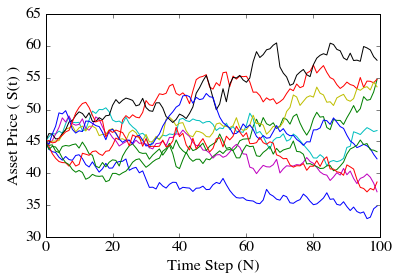

In [37]:
sims = 10
test = monte_carlo(sims, N, T, S0, sigma, r)

Hey, not too shabby!  This looks pretty believable, so let's move on to something more rigorous. How about 1,000 simulations?

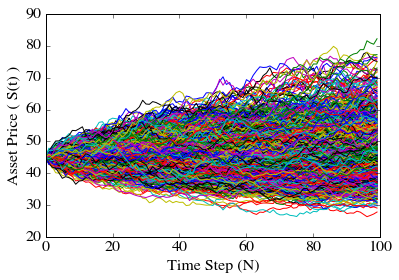

In [27]:
sims = 1000
MC_sim = monte_carlo(sims, N, T, S0, sigma, r)

Wow, look at all those lines and colors! Sometimes math really can be art. For our final step, we estimate the value of a European call by taking the average of the final asset prices for each simulated path and subtracting the strike price.

In [28]:
print("Monte-Carlo estimated value of European call is $%.3f" %(np.max((np.average(MC_sim[:,-1]) - K),0)))

Monte-Carlo estimated value of European call is $7.582


That result is not quite perfect, but we're certainly in the ballpark. Perhaps with more simulations and a more powerful computer, the answer would be even closer to the analytic result. Let's move on to valuing an Asian option.  Since we already performed the Monte-Carlo simulations, the only thing we need to change is how we process the results.  The first step will be to iteratively go through the matrix of resulting asset prices, averaging each column, which will yield an array characterizing the expected - or mean - path.  We will then apply the payoff equation for an Asian call which is

$$V_{call} = \textrm{max}(\ \textrm{avg}(\ S(t)\ )-K,0) $$

In [29]:
mean_path = np.zeros(N)
for i in range(N):
    mean_path[i] = np.average(MC_sim[:,i])

print("Monte-Carlo estimated value of Asian call is $%.3f" %(np.average(mean_path) - K))

Monte-Carlo estimated value of Asian call is $6.225


There you have it! We have successfully estimated the value of an Asian call, something that could not have been achieved analytically, nor with the Crank-Nicolson or binomial methods.  There isn't any great way to check the accuracy of this estimate, besides maybe adding more and more simulations, but we do expect an Asian call to be valued below a European call due to the averaged nature of its payoff.  Our result here at least meets that rather basic criterion.

## Conclusion

In this module, we have explored three different styles of options and four different methods for valuing them.  The most basic style, the European option, can be valued analytically using the Black-Scholes formula under known, constant market conditions.  If we have reason to believe that those conditions are non-constant, we can use the Crank-Nicolson method to estimate the option's value.  In the case of an American option, which is similar to the European style but allows for early exercise, we can employ the binomial model and work our way backwards from the set of all possible option payoffs to accurately value the option.  For a path dependent option such as that described by the Asian style, the Monte-Carlo method gives us the ability to extract an option's value estimate by analyzing a large number of simulated paths.  In conclusion, a number of financial derivative styles exist, each with unique mathematical properties.  It is crucial that traders and academics alike keep an equally diverse set of numerical schemes in their tool sets and apply them appropriately in order to determine an option's value.

<strong> Special thanks to:</strong>
<ul>
<li> Dr. Lorena Barba and her TA's, Naty Clementi and Gil Forsyth, for their patience and assistance and for putting on an <a href="http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about"> excellent course</a>.</li>
<li> Dr. Hugo Junghenn for his course "Mathematics of Finance" where I first came into contact with many of the concepts presented in this module. His book on option valuation can be found <a href="http://www.amazon.com/Option-Valuation-Financial-Mathematics-Chapman/dp/1439889112">here</a>.</li>
<li>Tingyu Wang for their <a href="http://nbviewer.ipython.org/github/numerical-mooc/assignment-bank/blob/705c3e47e5fd441c30a38c1ab17a80a75441e7d5/Black-Scholes-Equation/Black-Scholes-Equation.ipynb">MAE 6286 project</a> completed in 2014 that helped provide a jumping-off point for this module.</li>
<li>C.R. Nwozo and S.E. Fadugba whose <a href="http://www.scienpress.com/Upload/CMF/Vol%201_1_3.pdf">paper</a> was a source of inspiration and guidance for the creation of this module.</li>
</ul>

In [1]:
#Add custom CSS
from IPython.core.display import HTML
css_file = './styles/connor_style.css'
HTML(open(css_file, "r").read())

In [45]:
#Enable spellcheck
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>